# Determining intrinsic $P(k)$ from gridded data

[Jing 1995](http://adsabs.harvard.edu/abs/2005ApJ...620..559J) worked out how to determine the true power $P(k)$ from a gridded Fourier transform.

In [1]:
# Import some routines
%matplotlib inline
from array_io import *
import numpy as np
import matplotlib.pyplot as plt
from read_grid_fft import *

# Start with Nearest Grid Point interpolation

## Plot the distribution of particle positions in x-y plane

0.0001510363 0.9999578
0.000204247 0.9999855
3.36864e-05 0.9998738


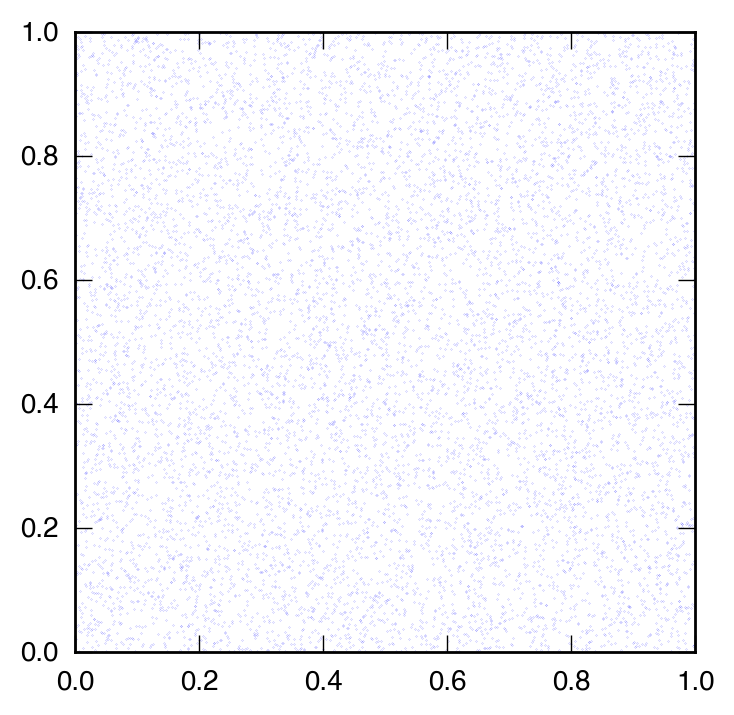

In [17]:
idx = 0
fdir = "ngp/"
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.',markersize=0.1)
plt.axes().set_aspect('equal')

print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

## Plot the uniformly distributed set of particles, interpolated onto a grid

(64, 64, 64)


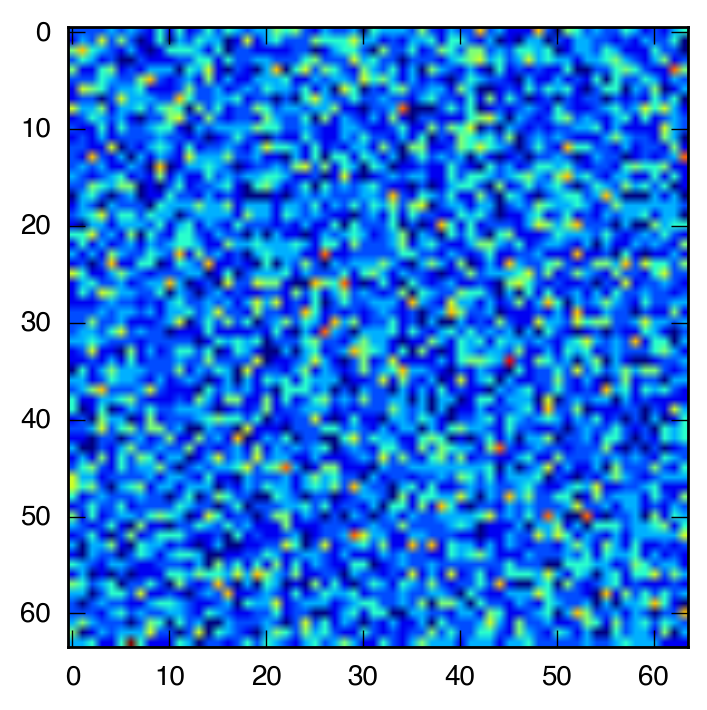

In [18]:
#Read in the three dimensional grid, and project it into 2 dimensions
idx = 0
fdir = "ngp/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

## Plot the 3D Fourier amplitudes $\delta^f(\vec{k})$, projected into 2D 

(64, 64, 64)


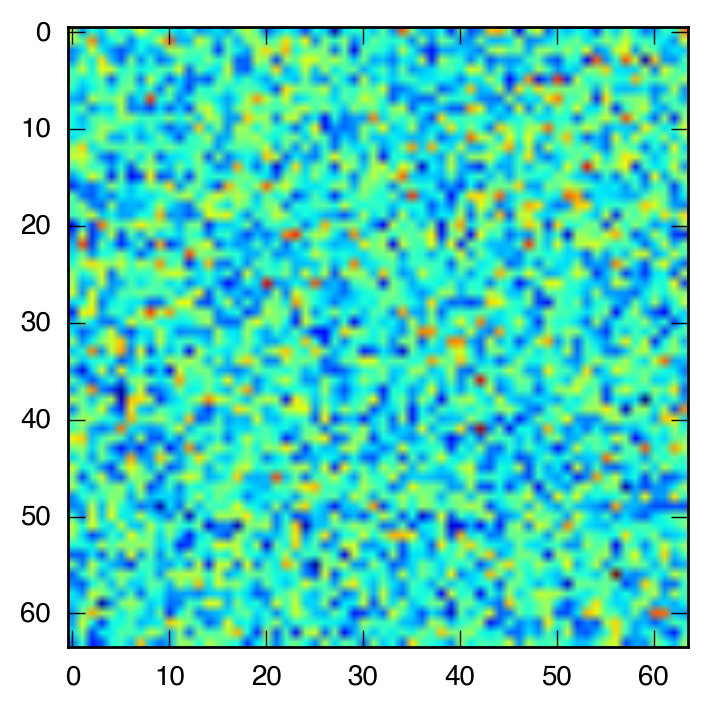

In [19]:
#Read in a delta^f_k grid

idx = 0
fdir = "ngp/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction

10000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.          0.03781289  0.024713    0.01855182  0.01645626  0.01217246
  0.01162738  0.00953152  0.00876295  0.00777105  0.00704976  0.00664475
  0.00598798  0.00550056  0.00531616  0.00488416  0.00469737  0.00432032
  0.00417258  0.00391996  0.00377208  0.00359086  0.00346058  0.00328052
  0.00319306  0.00300206  0.00293088  0.00277935  0.00277488  0.00261206
  0.00260243  0.00243892  0.00240727]
[ 0.          1.00043491  0.95713053  0.98166987  1.02769306  0.99635899
  0.99344355  1.00420826  0.99913052  1.00724375  0.98696681  1.00333597
  0.99659833  1.00073899  0.9959815   1.00214681  0.99646354  0.99929235
  1.00141974  0.9986285   1.00226787  0.99900764  1.00535595  1.00042405
  0.99907603  0.99793069  0.99865236  0.99281653  0.9989577   1.00079782
  1.00488874  0.99817221  0.99662063]


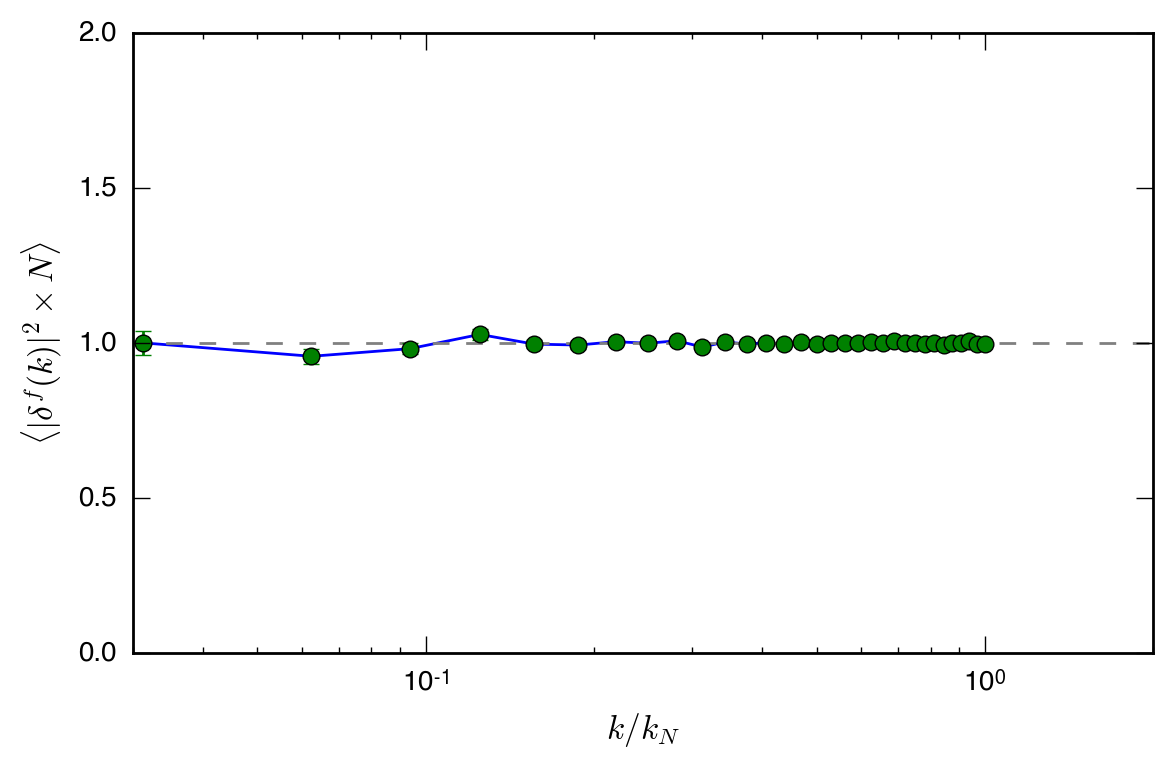

In [20]:
fdir  = "ngp/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)



for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]

nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
plt.plot(k_array,dfk_array/nk_array * float(N))
yerr = dfk_array*N /nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')
plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)


# Now do Cloud In Cell Interpolation

## Plot the distribution of particle positions in x-y plane

0.0001510363 0.9999578
0.000204247 0.9999855
3.36864e-05 0.9998738


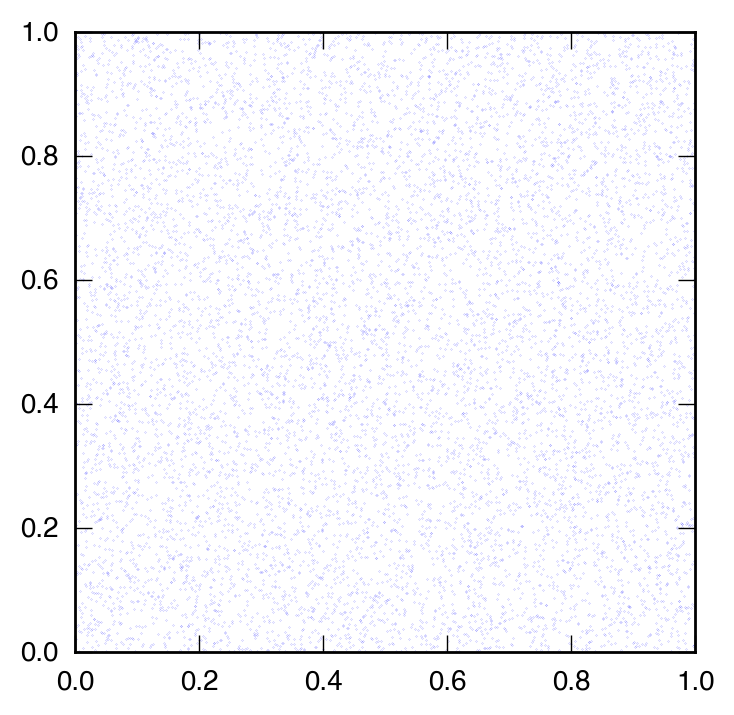

In [22]:
idx = 0
fdir = "cic/"
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.',markersize=0.1)
plt.axes().set_aspect('equal')

print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

## Plot the uniformly distributed set of particles, interpolated onto a grid

(64, 64, 64)


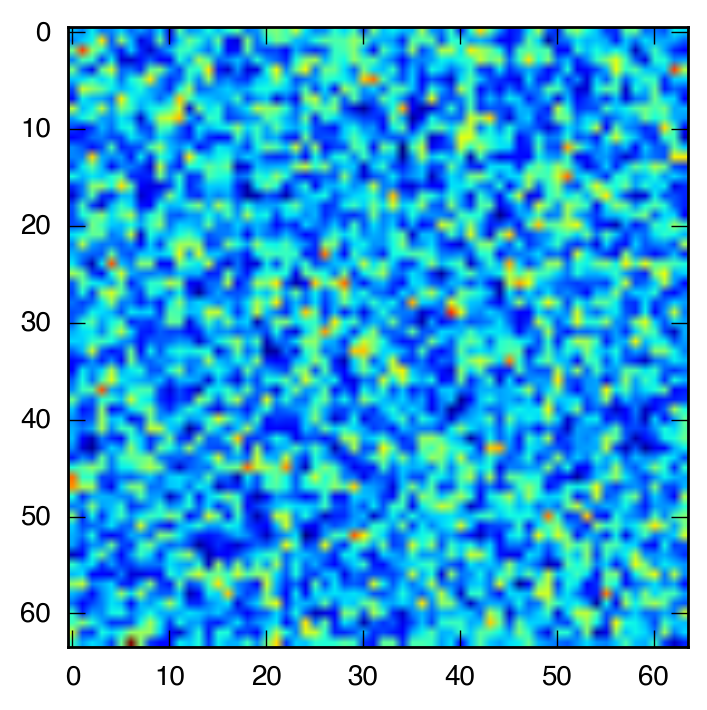

In [23]:
#Read in the three dimensional grid, and project it into 2 dimensions
idx = 0
fdir = "cic/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

## Plot the 3D Fourier amplitudes $\delta^f(\vec{k})$, projected into 2D

I'll first plot NGP, then CIC to show the difference.

(64, 64, 64)


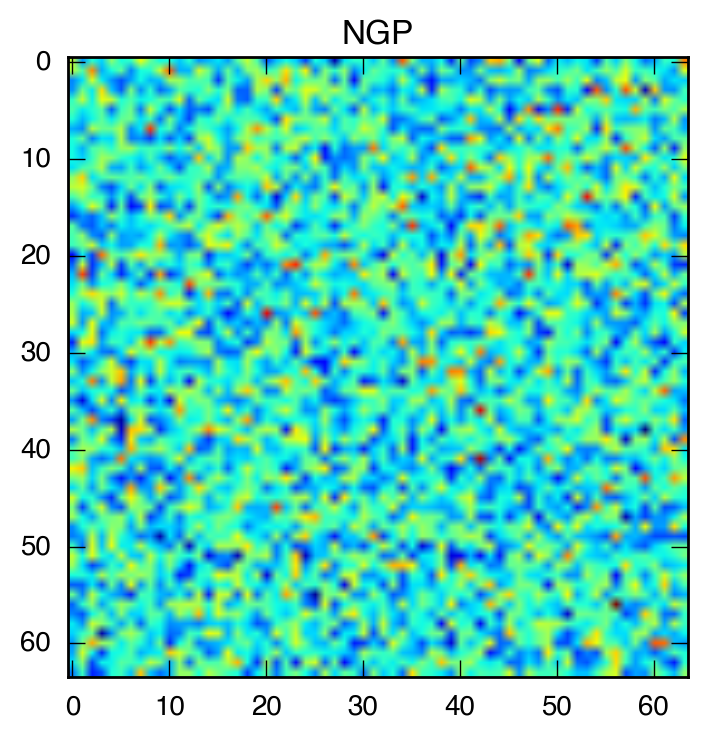

(64, 64, 64)


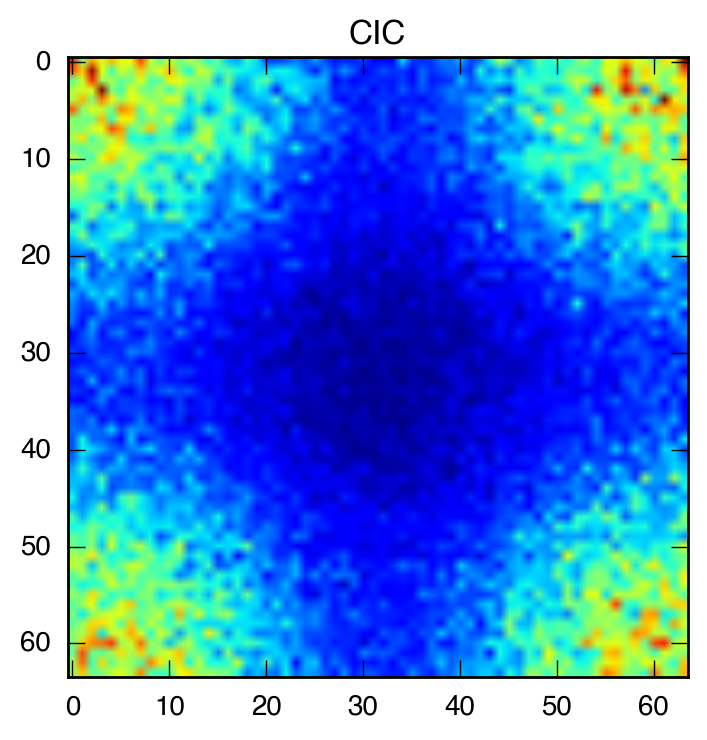

In [28]:
#Read in a delta^f_k grid

idx = 0
fdir = "ngp/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])
plt.title(r'NGP')
plt.imshow(dfkp.T)
plt.show()

#Read in a delta^f_k grid
plt.clf()

idx = 0
fdir = "cic/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])
plt.title(r'CIC')
plt.imshow(dfkp.T)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction

10000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.          0.03776048  0.02446256  0.01824248  0.01595297  0.01162058
  0.01092095  0.00870395  0.00784728  0.00670866  0.00592813  0.00536683
  0.00466028  0.0041165   0.00380511  0.00334951  0.00304131  0.00266202
  0.00242981  0.00214752  0.00194566  0.00174513  0.00157003  0.00140086
  0.00127268  0.00111251  0.0010173   0.00090154  0.00084393  0.0007415
  0.00069322  0.0006147   0.00057605]
[ 0.          0.99904828  0.94743071  0.96530129  0.99626295  0.95118568
  0.93308613  0.917018    0.89472748  0.86954172  0.8299378   0.81037409
  0.77562564  0.74893231  0.71288658  0.68726143  0.6451602   0.61572764
  0.58315542  0.54709221  0.51697595  0.48550884  0.4561202   0.42720617
  0.39820902  0.36981702  0.34663073  0.32203946  0.30381606  0.28410383
  0.26767699  0.25157741  0.23848721]


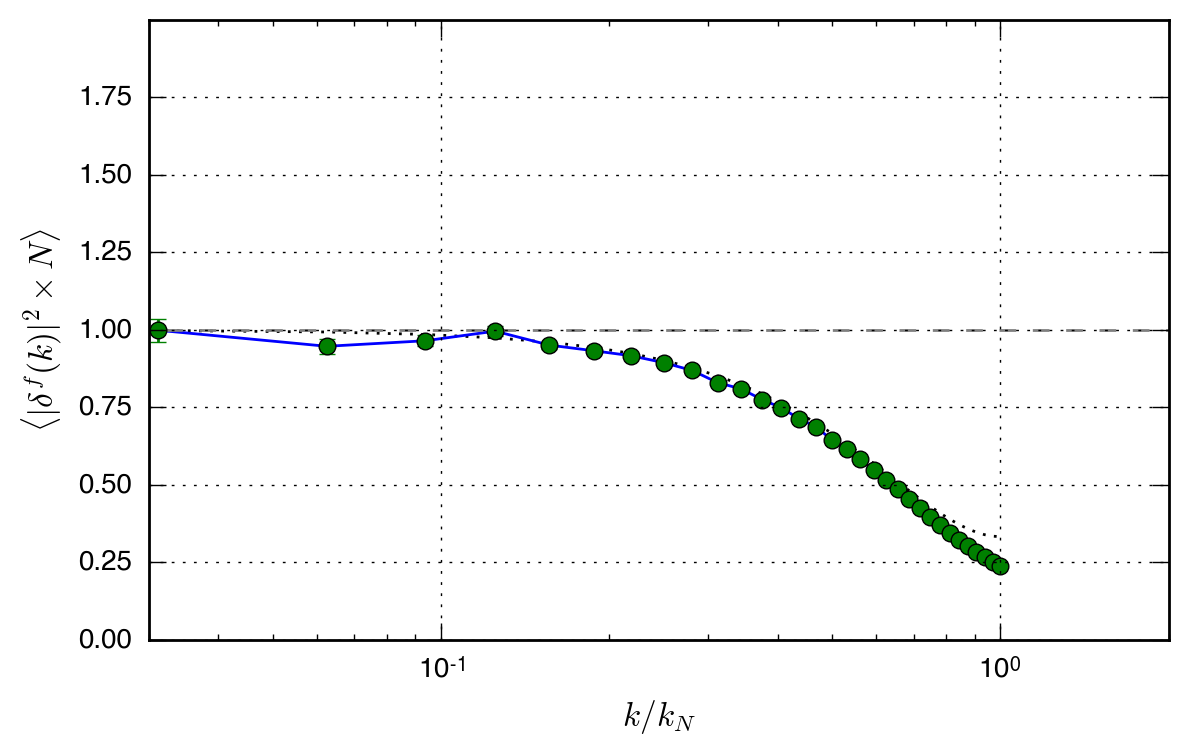

In [42]:
fdir  = "cic/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)



for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]

nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
                    
fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()
C1k = 1.0 - (2./3.)*np.sin(0.5*np.pi*k_array)**2
plt.plot(k_array,C1k,':',color="0")
plt.plot(k_array,dfk_array/nk_array * float(N))
yerr = dfk_array*N /nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')
plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)

## Average $\langle|\delta^f(k)|^2\rangle$ over multiple realizations and over direction, corrected for shot noise of the interpolation.

10000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.          0.03776048  0.02446256  0.01824248  0.01595297  0.01162058
  0.01092095  0.00870395  0.00784728  0.00670866  0.00592813  0.00536683
  0.00466028  0.0041165   0.00380511  0.00334951  0.00304131  0.00266202
  0.00242981  0.00214752  0.00194566  0.00174513  0.00157003  0.00140086
  0.00127268  0.00111251  0.0010173   0.00090154  0.00084393  0.0007415
  0.00069322  0.0006147   0.00057605]
[ 0.          0.99904828  0.94743071  0.96530129  0.99626295  0.95118568
  0.93308613  0.917018    0.89472748  0.86954172  0.8299378   0.81037409
  0.77562564  0.74893231  0.71288658  0.68726143  0.6451602   0.61572764
  0.58315542  0.54709221  0.51697595  0.48550884  0.4561202   0.42720617
  0.39820902  0.36981702  0.34663073  0.32203946  0.30381606  0.28410383
  0.26767699  0.25157741  0.23848721]


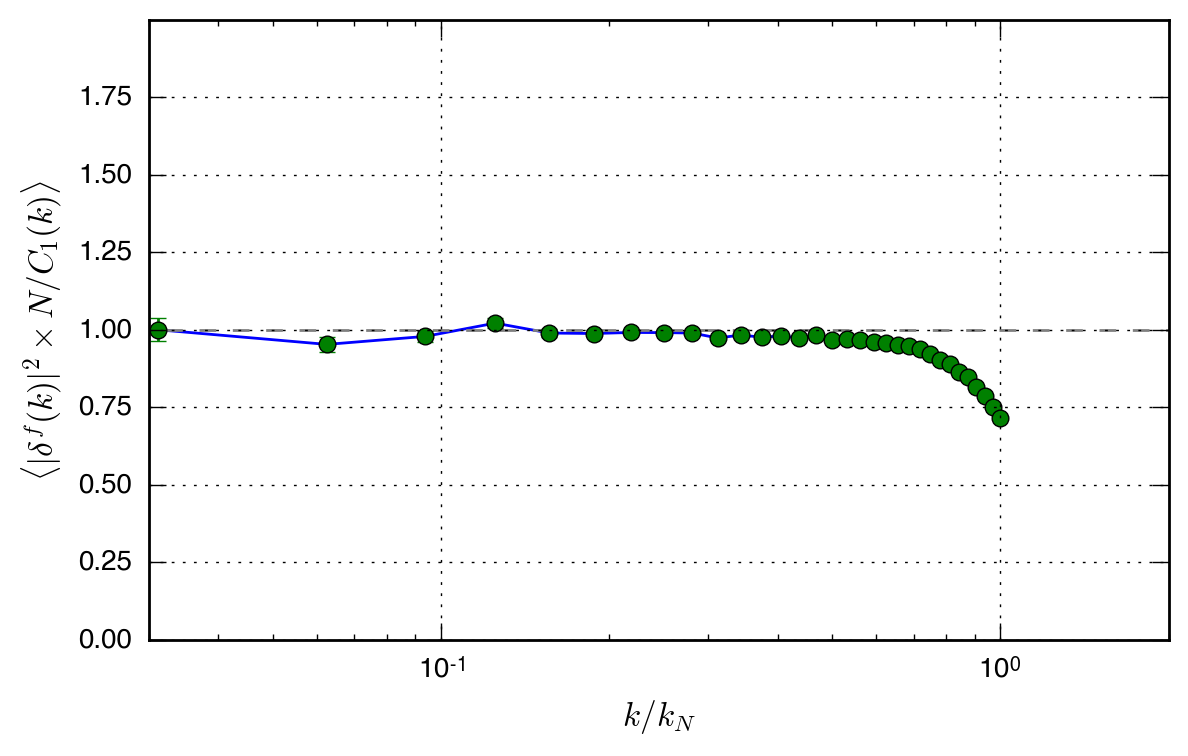

In [41]:
fdir  = "cic/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)



for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]

nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
                    
C1k = 1.0 - (2./3.)*np.sin(0.5*np.pi*k_array)**2

fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0,2,0.25))
plt.grid()

plt.plot(k_array,dfk_array/nk_array * float(N) / C1k)
yerr = dfk_array*N /nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0

plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N) / C1k, yerr=yerr, fmt='o')
plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N / C_1(k)\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)
